In [3]:
!pip install cufflinks
!pip install geopandas==0.3.0
!pip install pyshp==1.2.10
!pip install shapely==1.6.3

     |████████████████████████████████| 81 kB 14.7 MB/s eta 0:00:01
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67921 sha256=b5e3a7784dfdb21eec909d0af473ae01c1c699518714a443adc393f2480715d5
  Stored in directory: /home/jovyan/.cache/pip/wheels/e1/27/13/3fe67fa7ea7be444b831d117220b3b586b872c9acd4df480d0
Successfully built cufflinks


In [4]:
import plotly
import cufflinks as cf
cf.go_offline()

In [15]:
plotly.io.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [16]:
import plotly
import cufflinks as cf
cf.go_offline()

random_seed = 206

import projectFunctions as pF
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from razor import project_space_path as psp

In [11]:
train = pd.read_csv(psp('bank-product-recommendation/data/train.txt'), delimiter='|')
test = pd.read_csv(psp('bank-product-recommendation/data/test.txt'), delimiter='|')

In [18]:
train

,ID_Customer,Cod_Prod,Cod_Fecha,Socio_Demo_01,Socio_Demo_02,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05
0,A0000001,601,2007-05,5,4,3,1,0
1,A0000001,704,2013-04,5,4,3,1,0
2,A0000001,2501,2006-03,5,4,3,1,0
3,A0000001,2503,2006-03,5,4,3,1,0
4,A0000001,1011,2011-04,5,4,3,1,0
...,...,...,...,...,...,...,...,...
3350596,A0676369,2302,2015-10,3,2,3,1,0
3350597,A0676369,601,2015-07,3,2,3,1,0
3350598,A0676369,2205,2015-07,3,2,3,1,0
3350599,A0676370,601,2015-11,3,2,2,1,0


In [6]:
print(f"Len of Train set : {len(train)}")
print(f"Len of Test set : {len(test)}")

Len of Train set : 3350601
Len of Test set : 1147687


### Exploratory Data Analysis

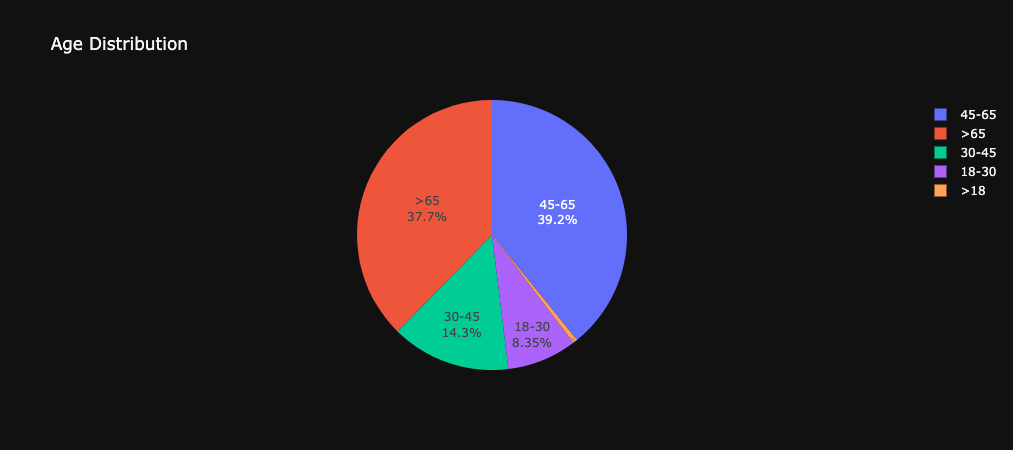

In [7]:
temp= pd.DataFrame(train.Socio_Demo_02.value_counts(sort=False))
temp.rename(columns = {'Socio_Demo_02':'#of people'}, inplace=True)
temp['Age(yrs)'] = ['>18', '18-30','30-45','45-65', '>65']

import plotly.express as px
fig = px.pie(temp, 
            values = '#of people', 
            names = 'Age(yrs)', 
            title= 'Age Distribution',template='plotly_dark')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

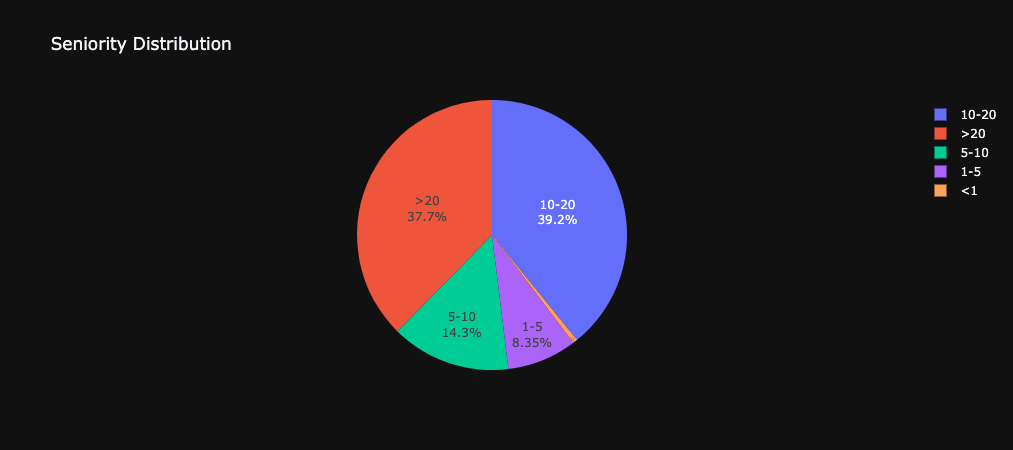

In [10]:
temp= pd.DataFrame(train.Socio_Demo_02.value_counts(sort=False))
temp.rename(columns = {'Socio_Demo_02':'#of people'}, inplace=True)
temp['Seniority(yrs)'] = ['<1' , '1-5', '5-10', '10-20', '>20']

import plotly.express as px
fig = px.pie(temp, 
            values = '#of people', 
            names = 'Seniority(yrs)', 
            title= 'Seniority Distribution ', 
            template='plotly_dark')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

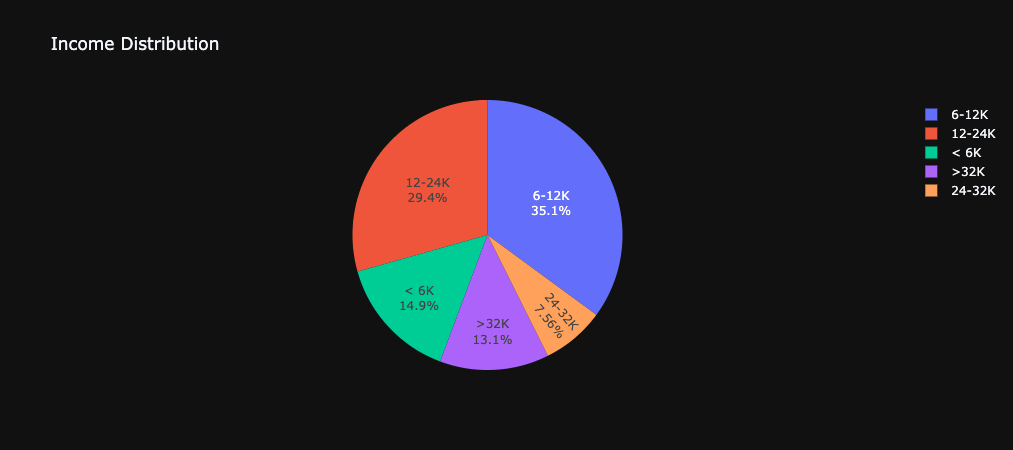

In [11]:
temp= pd.DataFrame(train.Socio_Demo_03.value_counts(sort=False))
temp.rename(columns = {'Socio_Demo_03':'#of people'}, inplace=True)
temp['Income'] = ['< 6K', '6-12K', '12-24K', '24-32K', '>32K']

import plotly.express as px
fig = px.pie(temp, 
            values = '#of people', 
            names = 'Income', 
            title= 'Income Distribution', 
            template='plotly_dark')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

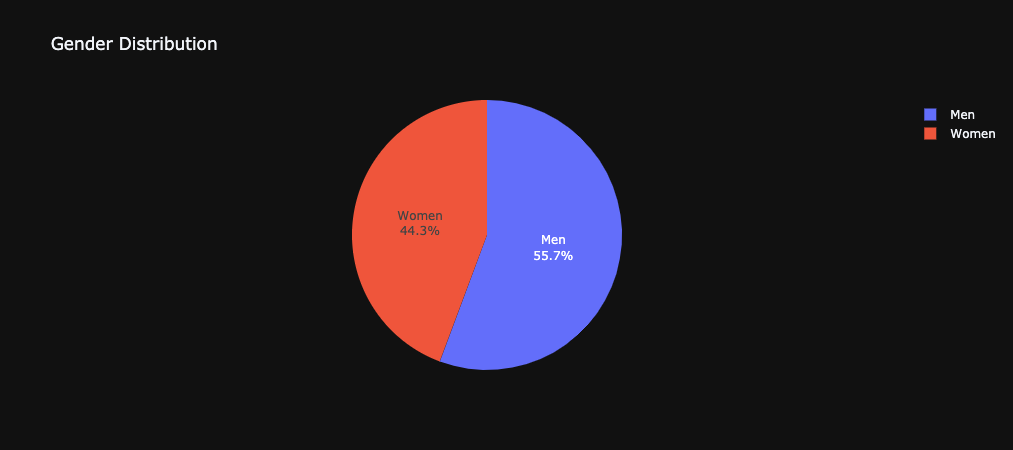

In [12]:
temp= pd.DataFrame(train.Socio_Demo_04.value_counts(sort=False))
temp.rename(columns = {'Socio_Demo_04':'#of people'}, inplace=True)
temp['Gender'] = ['Men','Women']

import plotly.express as px
fig = px.pie(temp, 
            values = '#of people', 
            names = 'Gender', 
            title= 'Gender Distribution',
            template='plotly_dark')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

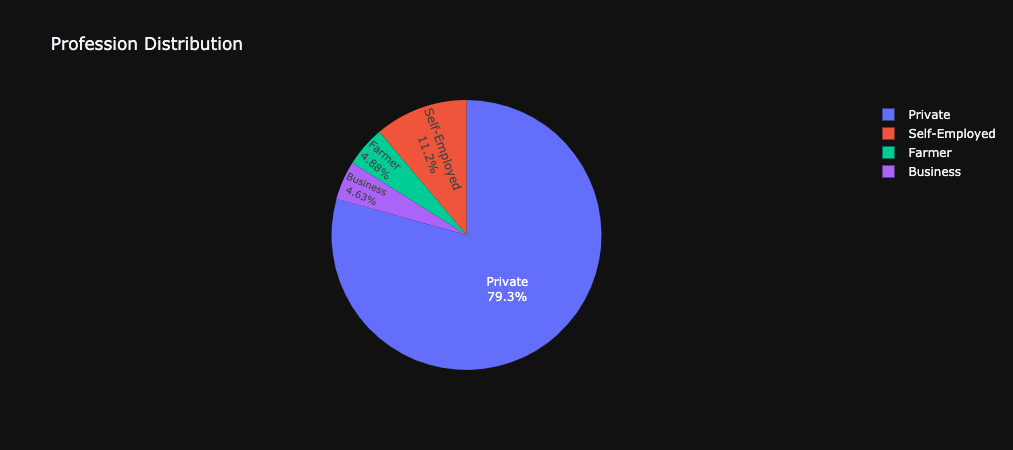

In [13]:
temp= pd.DataFrame(train.Socio_Demo_05.value_counts(sort=False))
temp.rename(columns = {'Socio_Demo_05':'#of people'}, inplace=True)
temp['Profession'] = ['Private' , 'Farmer', 'Business', 'Self-Employed']

import plotly.express as px
fig = px.pie(temp, 
            values = '#of people', 
            names = 'Profession', 
            title= 'Profession Distribution', 
            template='plotly_dark'
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

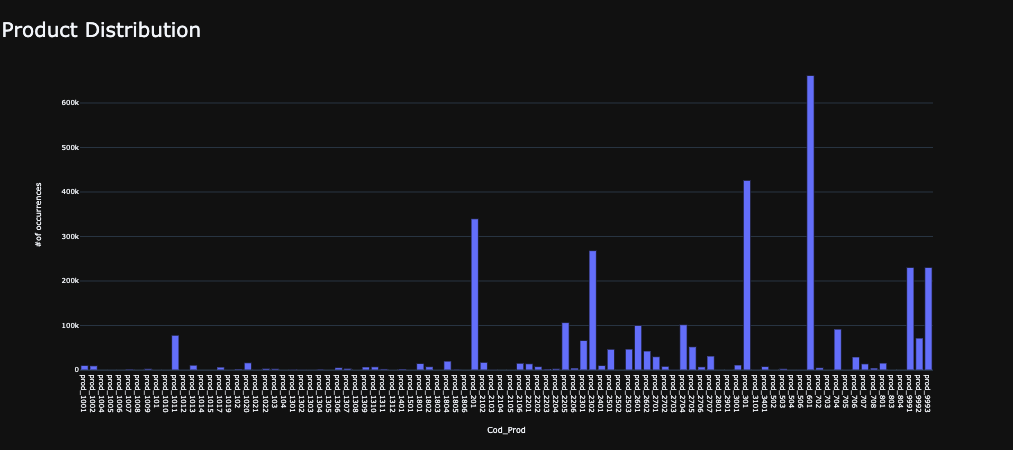

In [8]:
temp = pd.DataFrame(train.Cod_Prod.value_counts())
temp.rename(columns={'Cod_Prod':'#of occurrences'}, inplace=True)
temp['Cod_Prod'] = train.Cod_Prod.value_counts().index.tolist()
temp['Cod_Prod'] = temp.Cod_Prod.apply(lambda x: 'prod_'+str(x))
temp = temp.sort_values('Cod_Prod')

fig = px.bar(temp, x='Cod_Prod', y='#of occurrences', template='plotly_dark')
#fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(font_size = 7, title_font_size = 20, title={
        'text': "Product Distribution",
        'y':0.95,
        'x':0.1,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

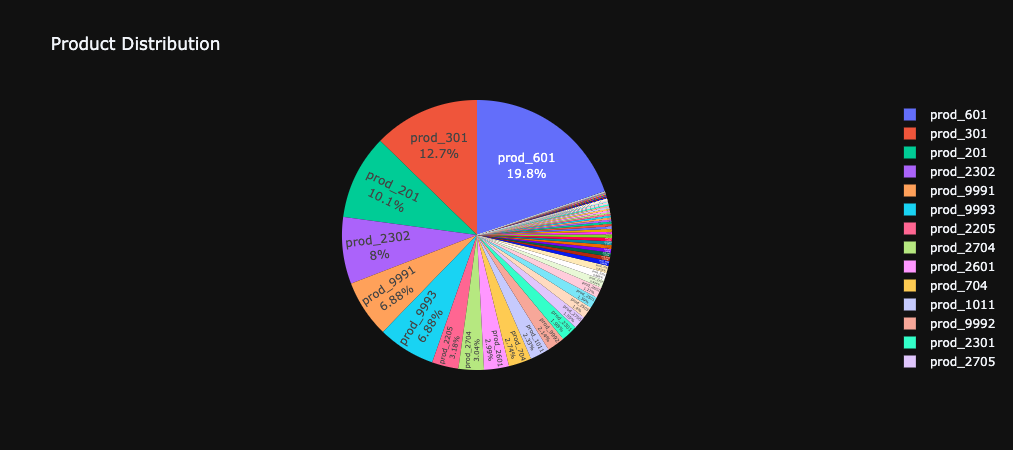

In [15]:
import plotly.express as px
fig = px.pie(temp, 
            values = '#of occurrences', 
            names = 'Cod_Prod', 
            title= 'Product Distribution', 
            template='plotly_dark'
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

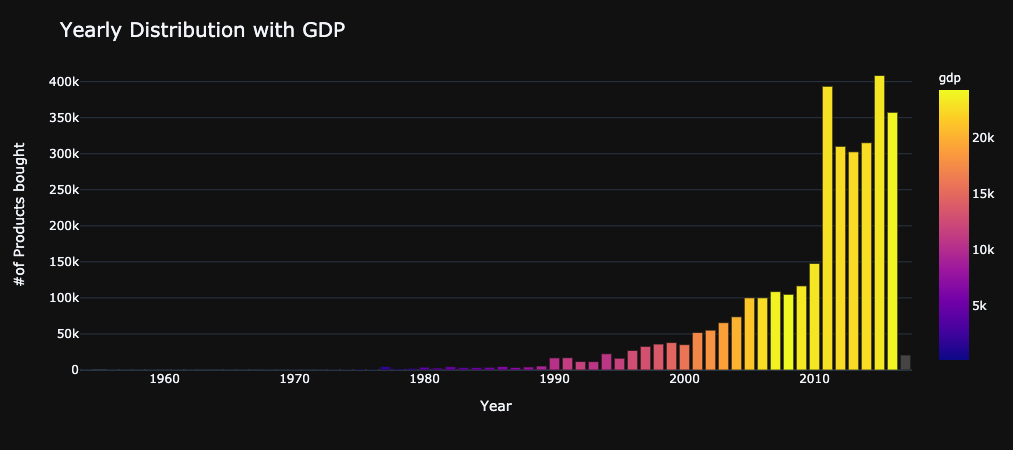

In [17]:
train['Year'] = train.Cod_Fecha.apply(lambda x: int(x[:4]))

temp = pd.DataFrame(train.Year.value_counts())
temp.rename(columns={'Year':'#of Products bought'}, inplace=True)
temp['Year'] = train.Year.value_counts().index.tolist()
temp.reset_index(drop=True, inplace=True)
#temp

gdp = pd.read_csv(psp('bank-product-recommendation/data/PIB.txt'), delimiter='\t')
#gdp.tail()

for yr in range(1954,1960):
    gdp = gdp.append({'Year': yr}, ignore_index=True)

gdp.fillna(100,inplace=True)

gdp['Year'] = gdp.Year.astype(int)
d_gdp = gdp.set_index('Year').to_dict()['PIB']

temp['gdp'] = temp.Year.map(d_gdp)


fig = px.bar(temp, x='Year', y='#of Products bought', color='gdp', template = 'plotly_dark')
fig.update_layout(title_font_size = 20, title={
        'text': "Yearly Distribution with GDP",
        'y':0.95,
        'x':0.2,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

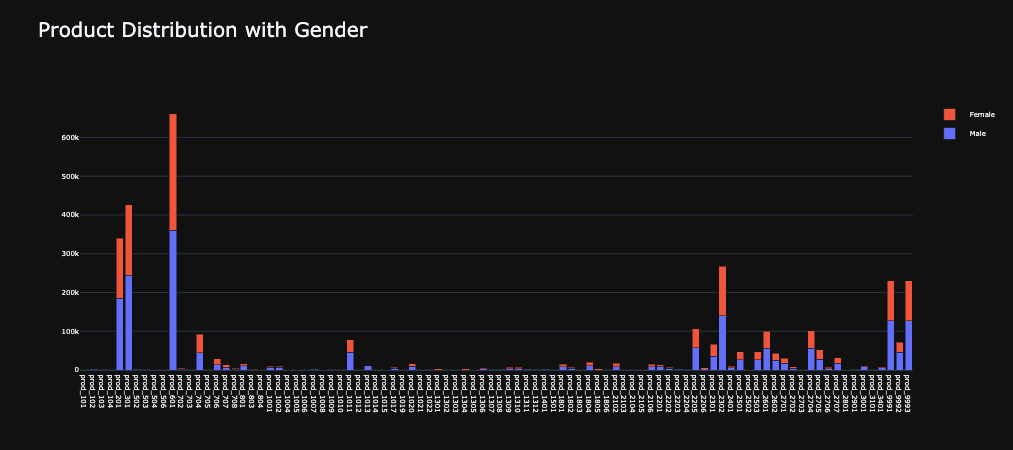

In [10]:
male = train[train.Socio_Demo_04 == 1].groupby('Cod_Prod').Socio_Demo_04.size().to_dict()
female = train[train.Socio_Demo_04 == 2].groupby('Cod_Prod').Socio_Demo_04.size().to_dict()

female[1312] = 0
female[2901] = 0

female = dict(sorted(female.items(), key=lambda kv: kv[0]))


import plotly.graph_objects as go
prods=['prod_'+str(k) for k,v in male.items()]

fig = go.Figure(data=[
    go.Bar(name='Male', x=prods, y=[v for k,v in male.items()]),
    go.Bar(name='Female', x=prods, y=[v for k,v in female.items()])
])
# Change the bar mode
fig.update_layout(barmode = 'stack',font_size = 7, title_font_size = 20, title={
        'text': "Product Distribution with Gender",
        'y':0.95,
        'x':0.2,
        'xanchor': 'center',
        'yanchor': 'top'},
        template = 'plotly_dark')
fig.show()

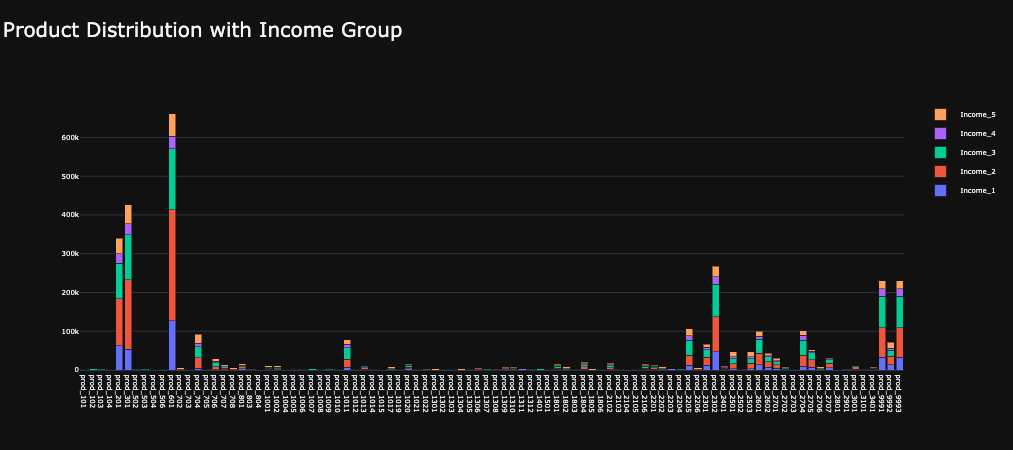

In [11]:
in_1 = train[train.Socio_Demo_03 == 1].groupby('Cod_Prod').Socio_Demo_03.size().to_dict()
in_1[502] = 0
in_1[1308] = 0
in_1[1312] = 0
in_1[2502] = 0
in_1 = dict(sorted(in_1.items(), key=lambda kv:kv[0]))

in_2 = train[train.Socio_Demo_03 == 2].groupby('Cod_Prod').Socio_Demo_03.size().to_dict()
in_2[502] = 0
in_2[1308] = 0
in_2[1312] = 0
in_2 = dict(sorted(in_2.items(), key=lambda kv:kv[0]))

in_3 = train[train.Socio_Demo_03 == 3].groupby('Cod_Prod').Socio_Demo_03.size().to_dict()
in_3[1312] = 0
in_3[2901] = 0
in_3 = dict(sorted(in_3.items(), key=lambda kv:kv[0]))

in_4 = train[train.Socio_Demo_03 == 4].groupby('Cod_Prod').Socio_Demo_03.size().to_dict()
in_4[502] = 0
in_4[803] = 0
in_4[1014] = 0
in_4[1308] = 0
in_4[1312] = 0
in_4[2801] = 0
in_4 = dict(sorted(in_4.items(), key=lambda kv:kv[0]))

in_5 = train[train.Socio_Demo_03 == 5].groupby('Cod_Prod').Socio_Demo_03.size().to_dict()

import plotly.graph_objects as go
prods=['prod_'+str(k) for k,v in male.items()]

fig = go.Figure(data=[
    go.Bar(name='Income_1', x=prods, y=[v for k,v in in_1.items()]),
    go.Bar(name='Income_2', x=prods, y=[v for k,v in in_2.items()]),
    go.Bar(name='Income_3', x=prods, y=[v for k,v in in_3.items()]),
    go.Bar(name='Income_4', x=prods, y=[v for k,v in in_4.items()]),
    go.Bar(name='Income_5', x=prods, y=[v for k,v in in_5.items()])
])
# Change the bar mode
fig.update_layout(barmode = 'stack',font_size = 7, title_font_size = 20, title={
        'text': "Product Distribution with Income Group",
        'y':0.95,
        'x':0.2,
        'xanchor': 'center',
        'yanchor': 'top'},
        template = 'plotly_dark')
fig.show()



#set(train.Cod_Prod.unique()).symmetric_difference(set(train[train.Socio_Demo_03 == 5].groupby('Cod_Prod').Socio_Demo_03.size().index))

In [124]:
##

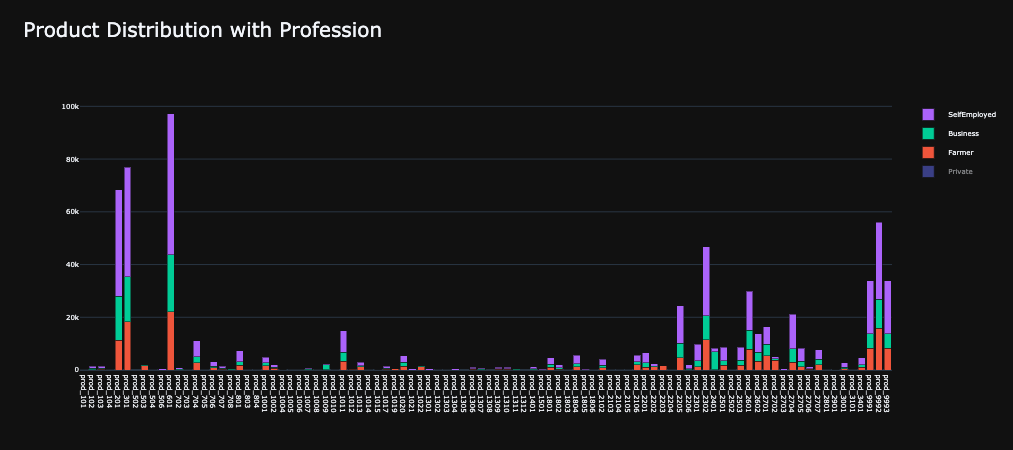

In [141]:
seg_0 = train[train.Socio_Demo_05 == 0].groupby('Cod_Prod').Socio_Demo_05.size().to_dict()
seg_0 = dict(sorted(seg_0.items(), key=lambda kv:kv[0]))

seg_1 = train[train.Socio_Demo_05 == 1].groupby('Cod_Prod').Socio_Demo_05.size().to_dict()
seg_1[502] = 0
seg_1[804] = 0
seg_1[1014] = 0
seg_1[1305] = 0
seg_1[1308] = 0
seg_1[1312] = 0
seg_1[2104] = 0
seg_1[2502] = 0
seg_1[2901] = 0
seg_1 = dict(sorted(seg_1.items(), key=lambda kv:kv[0]))

seg_2 = train[train.Socio_Demo_05 == 2].groupby('Cod_Prod').Socio_Demo_05.size().to_dict()
seg_2[502] = 0
seg_2[803] = 0
seg_2[1305] = 0
seg_2[1308] = 0
seg_2[1312] = 0
seg_2[2104] = 0
seg_2 = dict(sorted(seg_2.items(), key=lambda kv:kv[0]))

seg_3 = train[train.Socio_Demo_05 == 3].groupby('Cod_Prod').Socio_Demo_05.size().to_dict()
seg_3[1308] = 0
seg_3[1312] = 0
seg_3 = dict(sorted(seg_3.items(), key=lambda kv:kv[0]))



import plotly.graph_objects as go
prods=['prod_'+str(k) for k,v in male.items()]

fig = go.Figure(data=[
    go.Bar(name='Private', x=prods, y=[v for k,v in seg_0.items()]),
    go.Bar(name='Farmer', x=prods, y=[v for k,v in seg_1.items()]),
    go.Bar(name='Business', x=prods, y=[v for k,v in seg_2.items()]),
    go.Bar(name='SelfEmployed', x=prods, y=[v for k,v in seg_3.items()]),
])
# Change the bar mode
fig.update_layout(barmode = 'stack',font_size = 7, title_font_size = 20, title={
        'text': "Product Distribution with Profession",
        'y':0.95,
        'x':0.2,
        'xanchor': 'center',
        'yanchor': 'top'},
        template = 'plotly_dark')
fig.show()



#set(train.Cod_Prod.unique()).symmetric_difference(set(train[train.Socio_Demo_03 == 5].groupby('Cod_Prod').Socio_Demo_03.size().index))

In [1]:
################################################################################################################